In [12]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [13]:
train_data = pd.read_csv('Train_dataset.csv')
train_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [14]:
print(train_data.shape)
X_train = train_data.iloc[:,1:-1]
y_train = train_data.iloc[:,[-1]]
print(X_train.shape)
print(y_train.shape)

(7383, 15)
(7383, 13)
(7383, 1)


In [15]:
X_train.dtypes

Index                    object
Industry                 object
VWAP                    float64
General Index           float64
NAV                     float64
P/E Ratio               float64
Volumes Traded          float64
Inventory Turnover      float64
Covid Impact (Beta)     float64
Tracking Error          float64
Dollar Exchange Rate    float64
Put-Call Ratio          float64
P/B Ratio               float64
dtype: object

In [16]:
test_data = pd.read_csv('Test_1.csv')
test_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


In [17]:
for col in test_data.columns:
    print(col)

Stock Index
Index
Industry
VWAP
General Index
NAV
P/E Ratio
Volumes Traded
Inventory Turnover
Covid Impact (Beta)
Tracking Error
Dollar Exchange Rate
Put-Call Ratio
P/B Ratio


In [ ]:
#Assuming that except the Put-Call Ratio, all other parameters are static, we predict the stock price for 16th Aug

In [18]:
test_data = test_data.drop(['Put-Call Ratio'],axis=1)
df = pd.read_csv('Put-Call Ratio.csv',header=None)
test_data.insert(loc=12, column='Put-Call Ratio', value=df)
test_data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.911597,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,1.066333,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,1.247499,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.661127,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,1.865056,6.18


In [19]:
print(test_data.shape)
X_test = test_data.iloc[:,1:]
print(X_test.shape)

(3331, 14)
(3331, 13)


In [20]:
X_test.dtypes

Index                    object
Industry                 object
VWAP                    float64
General Index           float64
NAV                     float64
P/E Ratio               float64
Volumes Traded          float64
Inventory Turnover      float64
Covid Impact (Beta)     float64
Tracking Error          float64
Dollar Exchange Rate    float64
Put-Call Ratio          float64
P/B Ratio               float64
dtype: object

In [21]:
X_train.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20
1,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91
2,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09
3,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60
4,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46


In [22]:
X_test.head()

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.911597,4.66
1,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,1.066333,6.11
2,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,1.247499,4.99
3,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.661127,1.26
4,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,1.865056,6.18


In [23]:
y_train

,Stock Price
0,156.987852
1,560.859622
2,1279.732874
3,1121.787632
4,382.962534
...,...
7378,248.019321
7379,494.555631
7380,500.869063
7381,113.170686


In [24]:
data = X_train.append(X_test)
print(data.shape)

(10714, 13)


In [25]:
data.Index.unique()

array(['NYSE', 'BSE', 'S&P 500', 'NSE', 'JSE'], dtype=object)

In [26]:
data.Industry.unique()

array(['Real Estate', 'Information Tech', 'Materials', 'Healthcare',
       'Energy'], dtype=object)

In [27]:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)
numerical = data.select_dtypes(include = ["float64"]).keys()
print(numerical)

Index(['Index', 'Industry'], dtype='object')
Index(['VWAP', 'General Index', 'NAV', 'P/E Ratio', 'Volumes Traded',
       'Inventory Turnover', 'Covid Impact (Beta)', 'Tracking Error',
       'Dollar Exchange Rate', 'Put-Call Ratio', 'P/B Ratio'],
      dtype='object')


In [28]:
data = pd.get_dummies(data, columns = categorical)
data.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Index_BSE,Index_JSE,Index_NSE,Index_NYSE,Index_S&P 500,Industry_Energy,Industry_Healthcare,Industry_Information Tech,Industry_Materials,Industry_Real Estate
0,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,...,0,0,0,1,0,0,0,0,0,1
1,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,...,0,0,0,1,0,0,0,1,0,0
2,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,...,0,0,0,1,0,0,0,1,0,0
3,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,...,1,0,0,0,0,0,0,0,1,0
4,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,...,0,0,0,0,1,0,0,0,0,1


In [29]:
data.shape

(10714, 21)

In [30]:
print(data.isnull().sum())

VWAP                          50
General Index                333
NAV                          336
P/E Ratio                    526
Volumes Traded               316
Inventory Turnover           429
Covid Impact (Beta)          407
Tracking Error               197
Dollar Exchange Rate         220
Put-Call Ratio                85
P/B Ratio                    163
Index_BSE                      0
Index_JSE                      0
Index_NSE                      0
Index_NYSE                     0
Index_S&P 500                  0
Industry_Energy                0
Industry_Healthcare            0
Industry_Information Tech      0
Industry_Materials             0
Industry_Real Estate           0
dtype: int64


In [31]:
train_size = len(X_train)
test_size = len(X_test)
x_train = data.iloc[0:train_size]
x_test = data.iloc[train_size:]
print(x_train.shape)
print(x_test.shape)

(7383, 21)
(3331, 21)


In [32]:
# from sklearn.impute import SimpleImputer

# imp = SimpleImputer(strategy="mean")
# x_train = imp.fit_transform(x_train)
# print(x_train)
# x_test = imp.transform(x_test)
# print(x_test)

In [33]:
# from sklearn.impute import SimpleImputer

# imp = SimpleImputer(strategy="median")
# x_train = imp.fit_transform(x_train)
# print(x_train)
# x_test = imp.transform(x_test)
# print(x_test)

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
x_train = imp.fit_transform(x_train)
print(x_train)
x_test = imp.transform(x_test)
print(x_test)

[[7.002900e+02 1.276584e+04 3.238000e+01 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [2.145200e+02 1.276584e+04 3.325000e+01 ... 1.000000e+00 0.000000e+00
  0.000000e+00]
 [9.434200e+02 1.276584e+04 8.827000e+01 ... 1.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [1.319900e+02 5.572200e+04 2.616000e+01 ... 0.000000e+00 1.000000e+00
  0.000000e+00]
 [6.437200e+02 3.351280e+03 2.924000e+01 ... 0.000000e+00 1.000000e+00
  0.000000e+00]
 [1.264600e+02 3.351280e+03 2.330000e+01 ... 1.000000e+00 0.000000e+00
  0.000000e+00]]
[[5.33000000e+01 1.12701500e+04 4.45900000e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [7.49340000e+02 5.57220000e+04 7.42000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.67750000e+02 3.35128000e+03 8.84100000e+01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.11370000e+02 1.12701500e+04 5.48717056e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.79380000e+02 3.81820800e+04 2.05200000e+01 ... 0.00000000e+00
  0.0

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train[:,0:11] = sc_X.fit_transform(x_train[:,0:11]) #Scaler transformation only on numerical variables not on categorical variables
y_train = sc_y.fit_transform(y_train)
x_test[:,0:11] = sc_X.transform(x_test[:,0:11])
print(x_test)
print(x_train)

[[-1.55970178 -0.66054386 -0.39434465 ...  0.          1.
   0.        ]
 [ 0.94814662  1.60717406  0.75524295 ...  0.          0.
   0.        ]
 [ 0.2938736  -1.06452622  1.30693629 ...  1.          0.
   0.        ]
 ...
 [ 1.5319445  -0.66054386  0.0048354  ...  0.          0.
   0.        ]
 [-0.02452557  0.71237236 -1.32884562 ...  0.          0.
   0.        ]
 [-0.19729054 -0.58424101  0.84298588 ...  1.          0.
   0.        ]]
[[ 0.77141832 -0.58424101 -0.86838939 ...  0.          0.
   1.        ]
 [-0.97882235 -0.58424101 -0.83461225 ...  1.          0.
   0.        ]
 [ 1.6474214  -0.58424101  1.30150089 ...  1.          0.
   0.        ]
 ...
 [-1.27617987  1.60717406 -1.10987655 ...  0.          1.
   0.        ]
 [ 0.56759529 -1.06452622 -0.9902977  ...  0.          1.
   0.        ]
 [-1.29610459 -1.06452622 -1.22091406 ...  1.          0.
   0.        ]]


In [36]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
#y_train = y_train.ravel()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_train)
print(y_pred)
print(y_train)

y_test_pred = regressor.predict(x_test)
stock_price = sc_y.inverse_transform(y_test_pred)
print("Predicted Stock price for test data",stock_price.reshape(-1,1))

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_pred, squared=False)
print('RMSE obtained by using SVR:',rmse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[-0.91826882 -0.08517812  1.65306469 ... -0.17133214 -1.00197513
 -0.77955388]
[[-0.97326263]
 [-0.02043804]
 [ 1.67554609]
 ...
 [-0.1619693 ]
 [-1.0766372 ]
 [-0.78534269]]
Predicted Stock price for test data [[ 770.69256038]
 [ 214.28012109]
 [1570.20261542]
 ...
 [ 599.04689524]
 [ 364.48697574]
 [1358.18346989]]
RMSE obtained by using SVR: 0.16635524284629297


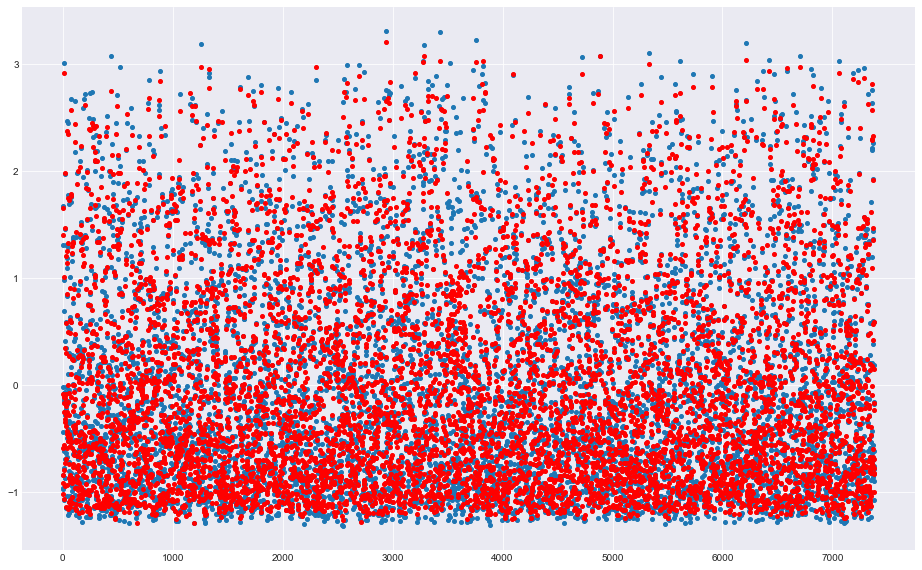

In [37]:
#To visualise the deviation between predicted and actual stock prices when SVR is used

plt.scatter(np.arange(len(y_train)),y_train)
plt.scatter(np.arange(len(y_pred)),y_pred,color='red')

In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import models

model = Sequential()
model.add(Dense(32, input_dim=21, activation='relu',kernel_initializer='normal' ))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear'))

opt = keras.optimizers.Adam(0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mse','mae'])
history = model.fit(x_train, y_train, epochs=800, batch_size=64, verbose=1, validation_split=0.2)


Train on 5906 samples, validate on 1477 samples
Epoch 1/800
5906/5906 [==============================] - 1s 217us/sample - loss: 0.1074 - mse: 0.1074 - mae: 0.1962 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.0944
Epoch 2/800
5906/5906 [==============================] - 0s 30us/sample - loss: 0.0435 - mse: 0.0435 - mae: 0.1101 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.0901
Epoch 3/800
5906/5906 [==============================] - 0s 29us/sample - loss: 0.0419 - mse: 0.0419 - mae: 0.1096 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0794
Epoch 4/800
5906/5906 [==============================] - 0s 29us/sample - loss: 0.0395 - mse: 0.0395 - mae: 0.1014 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.1049
Epoch 5/800
5906/5906 [==============================] - 0s 31us/sample - loss: 0.0375 - mse: 0.0375 - mae: 0.0912 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.0894
Epoch 6/800
5906/5906 [==============================] - 0s 28us/sample - loss: 0.0407 - mse: 0.0407 

Epoch 49/800
5906/5906 [==============================] - 0s 27us/sample - loss: 0.0266 - mse: 0.0266 - mae: 0.0820 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0659
Epoch 50/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0270 - mse: 0.0270 - mae: 0.0800 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.0887
Epoch 51/800
5906/5906 [==============================] - 0s 30us/sample - loss: 0.0270 - mse: 0.0270 - mae: 0.0836 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.0746
Epoch 52/800
5906/5906 [==============================] - 0s 28us/sample - loss: 0.0286 - mse: 0.0286 - mae: 0.0861 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.0755
Epoch 53/800
5906/5906 [==============================] - 0s 27us/sample - loss: 0.0250 - mse: 0.0250 - mae: 0.0765 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0615
Epoch 54/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0249 - mse: 0.0249 - mae: 0.0737 - val_loss: 0.0257 - val_mse:

Epoch 97/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0174 - mse: 0.0174 - mae: 0.0679 - val_loss: 0.0289 - val_mse: 0.0289 - val_mae: 0.0688
Epoch 98/800
5906/5906 [==============================] - 0s 27us/sample - loss: 0.0161 - mse: 0.0161 - mae: 0.0658 - val_loss: 0.0296 - val_mse: 0.0296 - val_mae: 0.0637
Epoch 99/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0158 - mse: 0.0158 - mae: 0.0605 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.0647
Epoch 100/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0144 - mse: 0.0144 - mae: 0.0605 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.0683
Epoch 101/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0164 - mse: 0.0164 - mae: 0.0673 - val_loss: 0.0292 - val_mse: 0.0292 - val_mae: 0.0655
Epoch 102/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0163 - mse: 0.0163 - mae: 0.0632 - val_loss: 0.0216 - val_m

Epoch 145/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0114 - mse: 0.0114 - mae: 0.0546 - val_loss: 0.0270 - val_mse: 0.0270 - val_mae: 0.0675
Epoch 146/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0111 - mse: 0.0111 - mae: 0.0523 - val_loss: 0.0211 - val_mse: 0.0211 - val_mae: 0.0556
Epoch 147/800
5906/5906 [==============================] - 0s 28us/sample - loss: 0.0106 - mse: 0.0106 - mae: 0.0506 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0603
Epoch 148/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0135 - mse: 0.0135 - mae: 0.0606 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.0602
Epoch 149/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0112 - mse: 0.0112 - mae: 0.0541 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.0567
Epoch 150/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0100 - mse: 0.0100 - mae: 0.0505 - val_loss: 0.0236 - va

5906/5906 [==============================] - 0s 24us/sample - loss: 0.0071 - mse: 0.0071 - mae: 0.0442 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.0527
Epoch 193/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0078 - mse: 0.0078 - mae: 0.0473 - val_loss: 0.0236 - val_mse: 0.0236 - val_mae: 0.0652
Epoch 194/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0077 - mse: 0.0077 - mae: 0.0506 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0499
Epoch 195/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0066 - mse: 0.0066 - mae: 0.0425 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0552
Epoch 196/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0074 - mse: 0.0074 - mae: 0.0475 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.0522
Epoch 197/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0071 - mse: 0.0071 - mae: 0.0444 - val_loss: 0.0223 - val_mse: 0.0223 

5906/5906 [==============================] - 0s 25us/sample - loss: 0.0072 - mse: 0.0072 - mae: 0.0465 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.0560
Epoch 240/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0078 - mse: 0.0078 - mae: 0.0497 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.0515
Epoch 241/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0074 - mse: 0.0074 - mae: 0.0445 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0494
Epoch 242/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0073 - mse: 0.0073 - mae: 0.0469 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.0640
Epoch 243/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0073 - mse: 0.0073 - mae: 0.0467 - val_loss: 0.0219 - val_mse: 0.0219 - val_mae: 0.0697
Epoch 244/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0083 - mse: 0.0083 - mae: 0.0513 - val_loss: 0.0188 - val_mse: 0.0188 

5906/5906 [==============================] - 0s 24us/sample - loss: 0.0073 - mse: 0.0073 - mae: 0.0436 - val_loss: 0.0162 - val_mse: 0.0162 - val_mae: 0.0508
Epoch 287/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0072 - mse: 0.0072 - mae: 0.0431 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0456
Epoch 288/800
5906/5906 [==============================] - 0s 23us/sample - loss: 0.0065 - mse: 0.0065 - mae: 0.0427 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0504
Epoch 289/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0059 - mse: 0.0059 - mae: 0.0432 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0507
Epoch 290/800
5906/5906 [==============================] - 0s 23us/sample - loss: 0.0055 - mse: 0.0055 - mae: 0.0414 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0545
Epoch 291/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0066 - mse: 0.0066 - mae: 0.0459 - val_loss: 0.0172 - val_mse: 0.0172 

5906/5906 [==============================] - 0s 23us/sample - loss: 0.0094 - mse: 0.0094 - mae: 0.0498 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.0533
Epoch 333/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0079 - mse: 0.0079 - mae: 0.0518 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.0626
Epoch 334/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0065 - mse: 0.0065 - mae: 0.0463 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.0664
Epoch 335/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0066 - mse: 0.0066 - mae: 0.0488 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.0604
Epoch 336/800
5906/5906 [==============================] - 0s 28us/sample - loss: 0.0056 - mse: 0.0056 - mae: 0.0428 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0504
Epoch 337/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0059 - mse: 0.0059 - mae: 0.0435 - val_loss: 0.0182 - val_mse: 0.0182 

Epoch 380/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0044 - mse: 0.0044 - mae: 0.0370 - val_loss: 0.0168 - val_mse: 0.0168 - val_mae: 0.0468
Epoch 381/800
5906/5906 [==============================] - 0s 27us/sample - loss: 0.0046 - mse: 0.0046 - mae: 0.0388 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.0534
Epoch 382/800
5906/5906 [==============================] - 0s 27us/sample - loss: 0.0065 - mse: 0.0065 - mae: 0.0452 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.0759
Epoch 383/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0078 - mse: 0.0078 - mae: 0.0494 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.0581
Epoch 384/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0070 - mse: 0.0070 - mae: 0.0460 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0802
Epoch 385/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0091 - mse: 0.0091 - mae: 0.0523 - val_loss: 0.0224 - va

5906/5906 [==============================] - 0s 27us/sample - loss: 0.0066 - mse: 0.0066 - mae: 0.0423 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.0459
Epoch 428/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0057 - mse: 0.0057 - mae: 0.0395 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.0545
Epoch 429/800
5906/5906 [==============================] - 0s 32us/sample - loss: 0.0065 - mse: 0.0065 - mae: 0.0459 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.0488
Epoch 430/800
5906/5906 [==============================] - 0s 29us/sample - loss: 0.0062 - mse: 0.0062 - mae: 0.0467 - val_loss: 0.0221 - val_mse: 0.0221 - val_mae: 0.0658
Epoch 431/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0057 - mse: 0.0057 - mae: 0.0415 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0614
Epoch 432/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0063 - mse: 0.0063 - mae: 0.0397 - val_loss: 0.0276 - val_mse: 0.0276 

5906/5906 [==============================] - 0s 24us/sample - loss: 0.0047 - mse: 0.0047 - mae: 0.0382 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.0499
Epoch 475/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0044 - mse: 0.0044 - mae: 0.0376 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0457
Epoch 476/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0041 - mse: 0.0041 - mae: 0.0368 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0447
Epoch 477/800
5906/5906 [==============================] - 0s 27us/sample - loss: 0.0041 - mse: 0.0041 - mae: 0.0363 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.0512
Epoch 478/800
5906/5906 [==============================] - 0s 30us/sample - loss: 0.0043 - mse: 0.0043 - mae: 0.0357 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.0467
Epoch 479/800
5906/5906 [==============================] - 0s 27us/sample - loss: 0.0052 - mse: 0.0052 - mae: 0.0376 - val_loss: 0.0207 - val_mse: 0.0207 

5906/5906 [==============================] - 0s 26us/sample - loss: 0.0059 - mse: 0.0059 - mae: 0.0422 - val_loss: 0.0302 - val_mse: 0.0302 - val_mae: 0.0516
Epoch 522/800
5906/5906 [==============================] - ETA: 0s - loss: 0.0051 - mse: 0.0051 - mae: 0.038 - 0s 24us/sample - loss: 0.0050 - mse: 0.0050 - mae: 0.0382 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.0596
Epoch 523/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0045 - mse: 0.0045 - mae: 0.0366 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.0449
Epoch 524/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0042 - mse: 0.0042 - mae: 0.0345 - val_loss: 0.0270 - val_mse: 0.0270 - val_mae: 0.0508
Epoch 525/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0046 - mse: 0.0046 - mae: 0.0363 - val_loss: 0.0312 - val_mse: 0.0312 - val_mae: 0.0591
Epoch 526/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0048 - mse: 0.0048

5906/5906 [==============================] - 0s 24us/sample - loss: 0.0045 - mse: 0.0045 - mae: 0.0385 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.0567
Epoch 569/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0048 - mse: 0.0048 - mae: 0.0382 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.0560
Epoch 570/800
5906/5906 [==============================] - 0s 28us/sample - loss: 0.0052 - mse: 0.0052 - mae: 0.0408 - val_loss: 0.0218 - val_mse: 0.0218 - val_mae: 0.0521
Epoch 571/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0052 - mse: 0.0052 - mae: 0.0395 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.0464
Epoch 572/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0053 - mse: 0.0053 - mae: 0.0424 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.0499
Epoch 573/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0051 - mse: 0.0051 - mae: 0.0383 - val_loss: 0.0229 - val_mse: 0.0229 

Epoch 615/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0047 - mse: 0.0047 - mae: 0.0399 - val_loss: 0.0257 - val_mse: 0.0257 - val_mae: 0.0652
Epoch 616/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0045 - mse: 0.0045 - mae: 0.0379 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.0477
Epoch 617/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0044 - mse: 0.0044 - mae: 0.0377 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.0528
Epoch 618/800
5906/5906 [==============================] - 0s 23us/sample - loss: 0.0049 - mse: 0.0049 - mae: 0.0380 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.0508
Epoch 619/800
5906/5906 [==============================] - 0s 23us/sample - loss: 0.0047 - mse: 0.0047 - mae: 0.0372 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.0581
Epoch 620/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0050 - mse: 0.0050 - mae: 0.0380 - val_loss: 0.0287 - va

5906/5906 [==============================] - 0s 24us/sample - loss: 0.0040 - mse: 0.0040 - mae: 0.0348 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0468
Epoch 663/800
5906/5906 [==============================] - 0s 23us/sample - loss: 0.0042 - mse: 0.0042 - mae: 0.0350 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.0494
Epoch 664/800
5906/5906 [==============================] - 0s 26us/sample - loss: 0.0039 - mse: 0.0039 - mae: 0.0350 - val_loss: 0.0262 - val_mse: 0.0262 - val_mae: 0.0578
Epoch 665/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0043 - mse: 0.0043 - mae: 0.0346 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.0493
Epoch 666/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0048 - mse: 0.0048 - mae: 0.0400 - val_loss: 0.0228 - val_mse: 0.0228 - val_mae: 0.0476
Epoch 667/800
5906/5906 [==============================] - 0s 23us/sample - loss: 0.0042 - mse: 0.0042 - mae: 0.0368 - val_loss: 0.0238 - val_mse: 0.0238 

Epoch 710/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0040 - mse: 0.0040 - mae: 0.0354 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.0458
Epoch 711/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0041 - mse: 0.0041 - mae: 0.0364 - val_loss: 0.0210 - val_mse: 0.0210 - val_mae: 0.0502
Epoch 712/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0037 - mse: 0.0037 - mae: 0.0337 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.0508
Epoch 713/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0048 - mse: 0.0048 - mae: 0.0362 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.0513
Epoch 714/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0050 - mse: 0.0050 - mae: 0.0373 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.0499
Epoch 715/800
5906/5906 [==============================] - 0s 23us/sample - loss: 0.0044 - mse: 0.0044 - mae: 0.0395 - val_loss: 0.0229 - va

5906/5906 [==============================] - 0s 24us/sample - loss: 0.0035 - mse: 0.0035 - mae: 0.0344 - val_loss: 0.0233 - val_mse: 0.0233 - val_mae: 0.0536
Epoch 758/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0032 - mse: 0.0032 - mae: 0.0321 - val_loss: 0.0214 - val_mse: 0.0214 - val_mae: 0.0498
Epoch 759/800
5906/5906 [==============================] - 0s 24us/sample - loss: 0.0032 - mse: 0.0032 - mae: 0.0325 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.0456
Epoch 760/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0033 - mse: 0.0033 - mae: 0.0327 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.0490
Epoch 761/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0033 - mse: 0.0033 - mae: 0.0341 - val_loss: 0.0211 - val_mse: 0.0211 - val_mae: 0.0462
Epoch 762/800
5906/5906 [==============================] - 0s 25us/sample - loss: 0.0033 - mse: 0.0033 - mae: 0.0343 - val_loss: 0.0194 - val_mse: 0.0194 

In [39]:
y_p = model.predict(x_train)
rmse1 = mean_squared_error(y_train, y_p, squared=False)
print('RMSE obtained by using feed forward neural network:',rmse1)

y_t = model.predict(x_test)
Stock_Price = sc_y.inverse_transform(y_t)
print("Predicted Stock price for test data using ANN",Stock_Price.reshape(-1,1))


RMSE obtained by using feed forward neural network: 0.08805877432873584
Predicted Stock price for test data using ANN [[ 805.396  ]
 [ 269.43524]
 [1538.6917 ]
 ...
 [ 563.97784]
 [ 358.2373 ]
 [1291.925  ]]


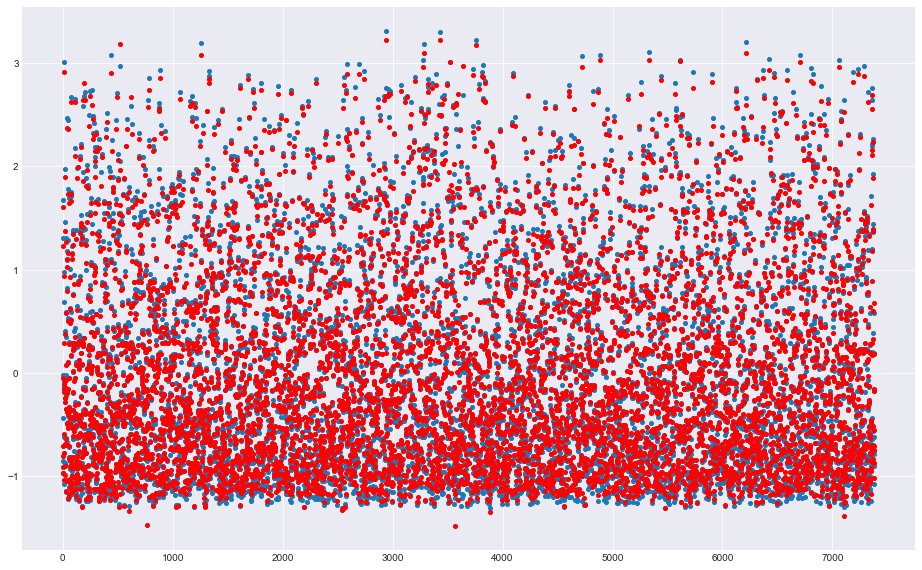

In [40]:
#To visualise the deviation between predicted and actual stock prices when ANN is used

plt.scatter(np.arange(len(y_train)),y_train)
plt.scatter(np.arange(len(y_p)),y_p,color='red')

In [41]:
Stock_Price = pd.DataFrame(Stock_Price)
output = pd.concat([test_data['Stock Index'], Stock_Price], axis=1)
output.columns = ['Stock Index','Stock Price']
print(output)

     Stock Index  Stock Price
0         AC3235   805.395996
1         AC3236   269.435242
2         AC3237  1538.691650
3         AC3238   822.967346
4         AC3239   299.853516
...          ...          ...
3326      AD2734   183.404541
3327      AD2735   422.101868
3328      AD2736   563.977844
3329      AD2737   358.237305
3330      AD2738  1291.925049

[3331 rows x 2 columns]


In [42]:
output.to_csv('output_02.csv',index=False) 